In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/synthetic_fraud_dataset.csv"

df = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

print(df.head())

  Transaction_ID    User_ID  Transaction_Amount Transaction_Type            Timestamp  Account_Balance Device_Type  Location Merchant_Category  IP_Address_Flag  Previous_Fraudulent_Activity  Daily_Transaction_Count  Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d   Card_Type  Card_Age  Transaction_Distance Authentication_Method  Risk_Score  Is_Weekend  Fraud_Label
0      TXN_33553  USER_1834               39.79              POS  2023-08-14 19:30:00         93213.17      Laptop    Sydney            Travel                0                             0                        7                     437.63                            3        Amex        65                883.17             Biometric      0.8494           0            0
1       TXN_9427  USER_7875                1.19    Bank Transfer  2023-06-07 04:01:00         75725.25      Mobile  New York          Clothing                0                             0                       13                     478.76           

In [ ]:
print("Dataset Info:")
print(df.info())

print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  

Class Distribution (Count of Fraud vs Non-Fraud):
Fraud_Label
0    33933
1    16067
Name: count, dtype: int64

🔹 Class Distribution (Percentage):
Fraud_Label
0    67.87
1    32.13
Name: proportion, dtype: float64


<ipython-input-3-8644dcce198e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Fraud_Label'], palette=["blue", "red"])


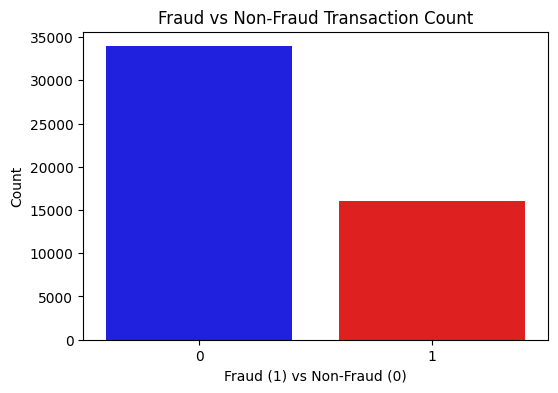

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


class_distribution = df['Fraud_Label'].value_counts()

print("Class Distribution (Count of Fraud vs Non-Fraud):")
print(class_distribution)

class_percentage = (df['Fraud_Label'].value_counts(normalize=True) * 100).round(2)
print("\n🔹 Class Distribution (Percentage):")
print(class_percentage)

plt.figure(figsize=(6,4))
sns.countplot(x=df['Fraud_Label'], palette=["blue", "red"])
plt.title("Fraud vs Non-Fraud Transaction Count")
plt.xlabel("Fraud (1) vs Non-Fraud (0)")
plt.ylabel("Count")
plt.show()

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"🔹 Duplicate Rows in Dataset: {duplicate_count}")
print(f"Unique values in 'Device_Type': {df['Device_Type'].nunique()}")
print(f"Unique values in 'Card_Type': {df['Card_Type'].nunique()}")
print(f"Unique values in 'Authentication_Method': {df['Authentication_Method'].nunique()}")
print(f"Unique values in 'Transaction_Type': {df['Transaction_Type'].nunique()}")
columns_to_check = ["Device_Type", "Card_Type", "Authentication_Method", "Transaction_Type"]

for col in columns_to_check:
    print(f"🔹 Unique values in '{col}':")
    print(df[col].unique(), "\n")

🔹 Duplicate Rows in Dataset: 0
Unique values in 'Device_Type': 3
Unique values in 'Card_Type': 4
Unique values in 'Authentication_Method': 4
Unique values in 'Transaction_Type': 4
🔹 Unique values in 'Device_Type':
['Laptop' 'Mobile' 'Tablet'] 

🔹 Unique values in 'Card_Type':
['Amex' 'Mastercard' 'Visa' 'Discover'] 

🔹 Unique values in 'Authentication_Method':
['Biometric' 'Password' 'OTP' 'PIN'] 

🔹 Unique values in 'Transaction_Type':
['POS' 'Bank Transfer' 'Online' 'ATM Withdrawal'] 



In [ ]:
df.drop(columns=['Transaction_ID', 'User_ID','Merchant_Category','Card_Age','Risk_Score'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_Amount            50000 non-null  float64
 1   Transaction_Type              50000 non-null  object 
 2   Timestamp                     50000 non-null  object 
 3   Account_Balance               50000 non-null  float64
 4   Device_Type                   50000 non-null  object 
 5   Location                      50000 non-null  object 
 6   IP_Address_Flag               50000 non-null  int64  
 7   Previous_Fraudulent_Activity  50000 non-null  int64  
 8   Daily_Transaction_Count       50000 non-null  int64  
 9   Avg_Transaction_Amount_7d     50000 non-null  float64
 10  Failed_Transaction_Count_7d   50000 non-null  int64  
 11  Card_Type                     50000 non-null  object 
 12  Transaction_Distance          50000 non-null  float64
 13  A

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Transaction_Date'] = df['Timestamp'].dt.date
df['Transaction_Time'] = df['Timestamp'].dt.time


df.to_csv("updated_dataset.csv", index=False)

print(df.head())


   Transaction_Amount Transaction_Type           Timestamp  Account_Balance Device_Type  Location  IP_Address_Flag  Previous_Fraudulent_Activity  Daily_Transaction_Count  Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d   Card_Type  Transaction_Distance Authentication_Method  Is_Weekend  Fraud_Label Transaction_Date Transaction_Time
0               39.79              POS 2023-08-14 19:30:00         93213.17      Laptop    Sydney                0                             0                        7                     437.63                            3        Amex                883.17             Biometric           0            0       2023-08-14         19:30:00
1                1.19    Bank Transfer 2023-06-07 04:01:00         75725.25      Mobile  New York                0                             0                       13                     478.76                            4  Mastercard               2203.36              Password           0            1       2023-

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_check = ["Device_Type", "Card_Type", "Authentication_Method", "Transaction_Type"]

label_encoders = {}

for col in columns_to_check:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(df.head())


   Transaction_Amount  Transaction_Type            Timestamp  Account_Balance  Device_Type  Location  IP_Address_Flag  Previous_Fraudulent_Activity  Daily_Transaction_Count  Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d  Card_Type  Transaction_Distance  Authentication_Method  Is_Weekend  Fraud_Label
0               39.79                 3  2023-08-14 19:30:00         93213.17            0    Sydney                0                             0                        7                     437.63                            3          0                883.17                      0           0            0
1                1.19                 1  2023-06-07 04:01:00         75725.25            1  New York                0                             0                       13                     478.76                            4          2               2203.36                      3           0            1
2               28.96                 2  2023-06-20 15:25:00          

In [ ]:
df.drop(columns=['Location'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_Amount            50000 non-null  float64
 1   Transaction_Type              50000 non-null  int64  
 2   Timestamp                     50000 non-null  object 
 3   Account_Balance               50000 non-null  float64
 4   Device_Type                   50000 non-null  int64  
 5   IP_Address_Flag               50000 non-null  int64  
 6   Previous_Fraudulent_Activity  50000 non-null  int64  
 7   Daily_Transaction_Count       50000 non-null  int64  
 8   Avg_Transaction_Amount_7d     50000 non-null  float64
 9   Failed_Transaction_Count_7d   50000 non-null  int64  
 10  Card_Type                     50000 non-null  int64  
 11  Transaction_Distance          50000 non-null  float64
 12  Authentication_Method         50000 non-null  int64  
 13  I

In [ ]:
df.drop(columns=['Timestamp'], inplace=True)

In [ ]:
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])

df["Year"] = df["Transaction_Date"].dt.year
df["Month"] = df["Transaction_Date"].dt.month
df["Day"] = df["Transaction_Date"].dt.day
df["Transaction_Time"] = pd.to_datetime(df["Transaction_Time"], format="%H:%M:%S")

df["Hour"] = df["Transaction_Time"].dt.hour
df["Minute"] = df["Transaction_Time"].dt.minute
df["Second"] = df["Transaction_Time"].dt.second
df.drop(columns=["Transaction_Date", "Transaction_Time"], inplace=True)

KeyError: 'Transaction_Date'

In [ ]:
df.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Transaction_Distance,Authentication_Method,Is_Weekend,Fraud_Label
0,39.79,3,93213.17,0,0,0,7,437.63,3,0,883.17,0,0,0
1,1.19,1,75725.25,1,0,0,13,478.76,4,2,2203.36,3,0,1
2,28.96,2,1588.96,2,0,0,14,50.01,4,3,1909.29,0,0,1
3,254.32,0,76807.20,2,0,0,8,182.48,4,3,1311.86,1,0,1
4,31.28,3,92354.66,1,0,1,14,328.69,4,2,966.98,3,1,1


In [ ]:
correlation_matrix = df.corr()

print(correlation_matrix)


                              Transaction_Amount  Transaction_Type  Account_Balance  Device_Type  IP_Address_Flag  Previous_Fraudulent_Activity  Daily_Transaction_Count  Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d  Card_Type  Transaction_Distance  Authentication_Method  Is_Weekend  Fraud_Label
Transaction_Amount                      1.000000         -0.002979        -0.002380     0.002216        -0.001620                      0.001668                 0.002149                  -0.006255                     0.001247  -0.007021              0.007935              -0.003419    0.001348     0.001901
Transaction_Type                       -0.002979          1.000000         0.001635    -0.003761         0.003392                     -0.003771                -0.002810                  -0.002300                     0.001111   0.001488              0.004412              -0.006421   -0.000517    -0.004592
Account_Balance                        -0.002380          0.001635         1.00000

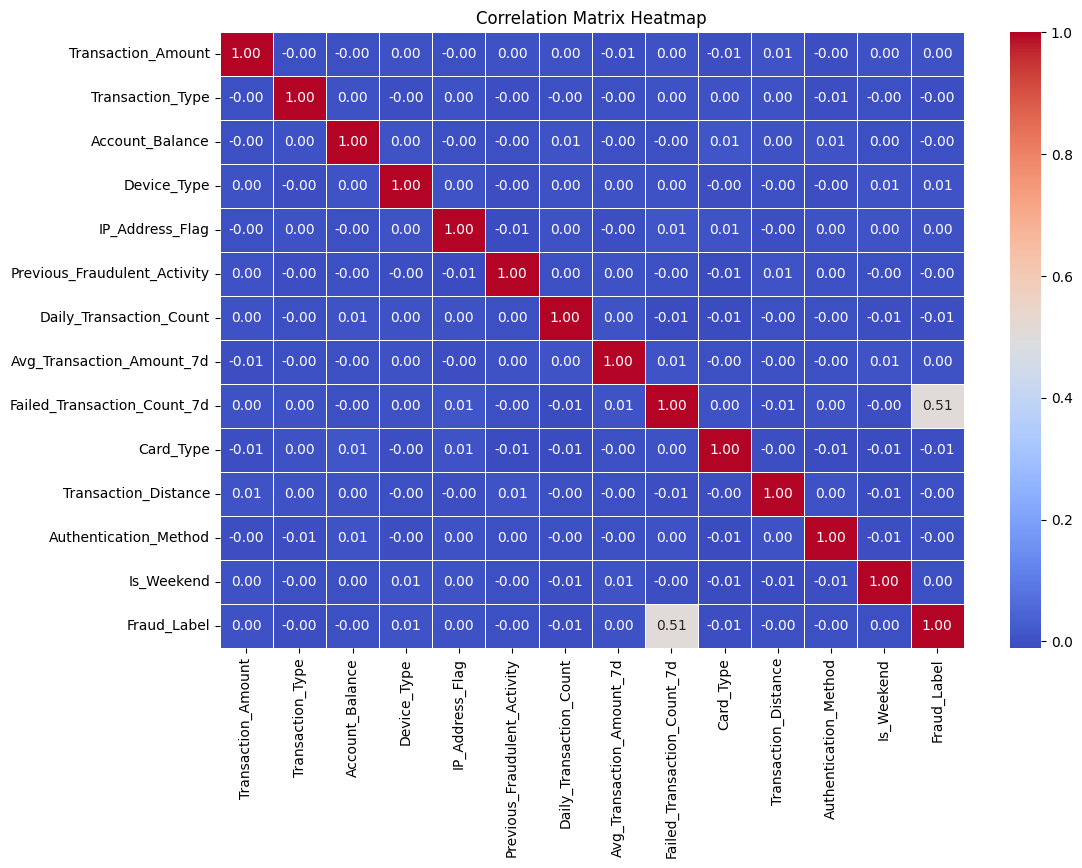

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
for col in columns_to_check:
    print(f"Label encoding for '{col}':")
    le = label_encoders[col]
    for i, class_ in enumerate(le.classes_):
        print(f"  {i}: {class_}")
    print()


Label encoding for 'Device_Type':
  0: Laptop
  1: Mobile
  2: Tablet

Label encoding for 'Card_Type':
  0: Amex
  1: Discover
  2: Mastercard
  3: Visa

Label encoding for 'Authentication_Method':
  0: Biometric
  1: OTP
  2: PIN
  3: Password

Label encoding for 'Transaction_Type':
  0: ATM Withdrawal
  1: Bank Transfer
  2: Online
  3: POS

